In [217]:
import sys
from pyrpl import Pyrpl
import numpy as np
import time
import matplotlib.pyplot as plt

import IPython
import ipywidgets as widgets

from bokeh.plotting import figure, show
from bokeh.io import output_notebook, push_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Toggle, Range1d

from scipy.signal import welch

from datetime import datetime

In [219]:
HOSTNAME = "rp-f0839f.local"
p = Pyrpl(hostname=HOSTNAME, config='ASG_Scope_test')
p.hide_gui()


INFO:pyrpl:All your PyRPL settings will be saved to the config file
    C:\Users\l_vis\pyrpl_user_dir\config\ASG_Scope_test.yml
If you would like to restart PyRPL with these settings, type "pyrpl.exe ASG_Scope_test" in a windows terminal or 
    from pyrpl import Pyrpl
    p = Pyrpl('ASG_Scope_test')
in a python terminal.
INFO:pyrpl.redpitaya:Successfully connected to Redpitaya with hostname rp-f0839f.local.


In [415]:
r = p.rp
scope = r.scope

asg1 = r.asg1
asg0 = r.asg0

scope.input1 = 'in1'
scope.input2 = 'in2'
scope.decimation = 1024
scope.average = False
scope.trigger_source = 'immediately'

INFO:pyrpl.modules:Calling setup() for scope.decimation ...


In [428]:
def get_data(output=True):
    if output:
        %time asg0.output_direct = 'out1'
        %time asg1.output_direct = 'out2'
    scope._start_acquisition()
    time.sleep(scope.duration)
    ch1, ch2 = scope._get_curve()
    #scope.single()  # the function would not return until acquisition is complete.
    #scope.single_async() # for an asynchronous acquisition (the function returns immediately)
    t = scope.times
    
    return ch1, ch2, t


ERROR:paramiko.transport:Socket exception: An existing connection was forcibly closed by the remote host (10054)


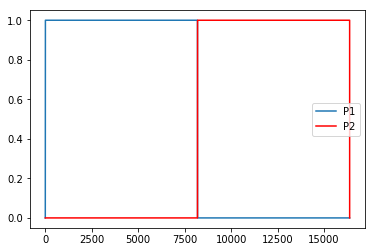

In [222]:
n = 2**14
maxf = 7629

x = np.linspace(0, 25*np.pi, n)
pulse1, pulse2 = np.zeros(n), np.zeros(n)

offset = 0 
 
pulse1[1:int(n/2)] = 1
pulse2[int(n/2)-offset:-1-offset] = 1

fancy_shape = pulse1*np.sin(x)*np.exp(-x/50)

plt.plot(pulse1, label='P1')
plt.plot(pulse2, label='P2', color='r')
#plt.plot(fancy_shape, label='I like')
plt.legend()

# Live display

In [318]:
# For the gui updates during the live view loops
ipython = IPython.get_ipython()

# For Bokeh
output_notebook()

ch1 = []
ch2 = []
t = []

def update_display():
    global ch1, ch2, t
    ch1, ch2, t = get_data()
    
    p1.title.text = 'Oscilloscope input'
    source1.data = dict(x=t*1e3, y=ch1)
    source2.data = dict(x=t*1e3, y=ch2)
    
    if scale_mode.value == "Full range":
        p1.y_range.start = -p1_full_scale
        p1.y_range.end = p1_full_scale

asg0.setup(output_direct = "off", frequency=1, amplitude=0.3,
           trigger_source='immediately', cycles_per_burst=0)        
asg1.setup(output_direct = "off", frequency=1, amplitude=0.3,
           trigger_source='immediately', cycles_per_burst=0)  
asg0.data = pulse1
asg1.data = pulse2

        
range1 = Range1d()
source1 = ColumnDataSource()
source2 = ColumnDataSource()

p1 = figure(title="Channel 1", plot_height=300, plot_width=900, toolbar_location=None, y_range = range1)
p1.yaxis.axis_label = 'Voltage'
p1.xaxis.axis_label = 'Time (ms)'

p1.line('x', 'y', source=source1, legend_label='Ch1')
p1.line('x', 'y', source=source2, legend_label='Ch2', color='red')

p1_full_scale = 1.1

style = {'description_width': 'initial'}

stop_button = widgets.ToggleButton(description='Stop')
pause_button = widgets.ToggleButton(description='Pause')

scale_mode = widgets.RadioButtons(options=['Full range'])

#asg1.output_direct = 'out1'
update_display()
target = show(column(p1), notebook_handle=True)
rows = []

rows.append(widgets.HBox([stop_button,pause_button,scale_mode]))
display(widgets.VBox(rows))

while True:
    ipython.kernel.do_one_iteration()
    if not pause_button.value:
        update_display()
    ipython.kernel.do_one_iteration()
    if stop_button.value:
        asg0.output_direct = 'off'
        asg1.output_direct = 'off'
        break
    push_notebook(handle=target)
    
print("Live view done")

Loading BokehJS ...

Wall time: 884 µs
Wall time: 1.09 ms


Wall time: 998 µs
Wall time: 998 µs
Wall time: 0 ns
Wall time: 997 µs
Wall time: 692 µs
Wall time: 0 ns
Wall time: 828 µs
Wall time: 997 µs
Wall time: 989 µs
Wall time: 997 µs
Wall time: 996 µs
Wall time: 997 µs
Wall time: 931 µs
Wall time: 998 µs
Wall time: 903 µs
Wall time: 558 µs
Wall time: 965 µs
Wall time: 998 µs
Wall time: 804 µs
Wall time: 999 µs
Wall time: 998 µs
Wall time: 0 ns
Wall time: 21.9 ms
Wall time: 967 µs
Wall time: 950 µs
Wall time: 998 µs
Wall time: 0 ns
Wall time: 951 µs
Wall time: 1.6 ms
Wall time: 998 µs
Wall time: 1.03 ms
Wall time: 2.07 ms
Wall time: 1.27 ms
Wall time: 1.06 ms
Wall time: 809 µs
Wall time: 997 µs
Wall time: 0 ns
Wall time: 998 µs
Wall time: 592 µs
Wall time: 0 ns
Wall time: 894 µs
Wall time: 1.99 ms
Wall time: 995 µs
Wall time: 696 µs
Wall time: 621 µs
Wall time: 1.07 ms
Wall time: 966 µs
Wall time: 416 µs
Wall time: 28.9 ms
Wall time: 1.11 ms
Wall time: 1.04 ms
Wall time: 997 µs
Wall time: 966 µs
Wall time: 997 µs
Wall time: 997 µs
Wall time: 1

# Snapshot

Wall time: 995 µs
Wall time: 1.01 ms


Text(0, 0.5, 'Voltage')

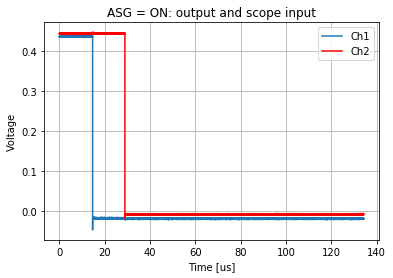

In [427]:
# max frequency = 7629?



asg0.setup(output_direct = "off", frequency=8, amplitude=.5, trigger_source='immediately', start_phase= 0, 
        cycles_per_burst=1)
asg1.setup(output_direct = "off", frequency=8, amplitude=.5, trigger_source='immediately', start_phase= 0,
           cycles_per_burst=1)

asg0.data = pulse1
asg1.data = pulse1

ch1, ch2, t = get_data()

asg0.output_direct = 'off'
asg1.output_direct = 'off'

timescale = 1e3

plt.plot(t*timescale, ch1, label='Ch1')
plt.plot(t*timescale, ch2, label='Ch2', color='r')
plt.legend()
plt.grid()
plt.title("ASG = ON: output and scope input")
plt.xlabel("Time [us]")
plt.ylabel("Voltage")


# Check if outputs are off:

Text(0, 0.5, 'Voltage')

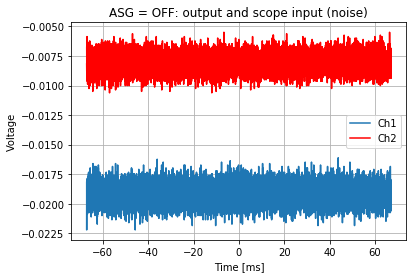

In [378]:
ch1, ch2, t = get_data(output=False)

plt.plot(t*1e3, ch1, label='Ch1')
plt.plot(t*1e3, ch2, label='Ch2', color='r')
plt.legend()
plt.grid()
plt.title("ASG = OFF: output and scope input (noise)")
plt.xlabel("Time [ms]")
plt.ylabel("Voltage")
